In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import pickle
import joblib

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### **Mempersiapkan data**

In [ ]:
# Membuka dan membaca file data tangkapan ikan
data_tangkapan = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/Data DPI 2018/Hasil tangkapan dan variabel lingkungan/Hasil tangkapan & variabel lingkungan.csv')

# Mengatur kolom 'datetime' sebagai index
data_tangkapan.set_index('datetime', inplace=True)

# DROP kolom/fitur yang tidak akan dipakai (jenis ikan lainnya, musim penangkapan ikan, arah angin, dan arah arus)
data_tangkapan.drop(data_tangkapan.columns[[0, 2, 3, 4, 5, 12, 14, 16]], axis=1, inplace=True)

# Memastikan semua data numerik dalam bentuk float
values = data_tangkapan.values
values = values.astype('float32')

data_tangkapan

,Maesang (Cakalang),sst_dailymean (C),chlorofil_dailymean (mg/m^3),eastward_seawater_dailymean (m/s),northward_seawater_dailymean (m/s),eastward_wind_dailymean (m/s),northward_wind_dailymean (m/s),wind_magnitude_dailymean (m/s),seawater_magnitude_dailymean (m/s)
datetime,,,,,,,,,
1/4/2018,1320,29.312853,0.191309,0.028687,-0.075512,-4.557285,-2.767206,5.331630,0.080777
1/5/2018,4060,29.329287,0.171732,-0.056634,0.013123,-6.044079,-1.501644,6.227827,0.058134
1/6/2018,9700,29.266427,0.164844,-0.078302,0.149933,-6.126054,1.050582,6.215485,0.169148
1/7/2018,10710,29.185710,0.187319,-0.021494,0.245761,-5.290941,-1.605702,5.529225,0.246699
1/8/2018,8180,29.364286,0.183835,0.075337,0.207439,-3.340755,-3.694750,4.981147,0.220695
...,...,...,...,...,...,...,...,...,...
12/6/2022,8416,29.763572,0.114430,0.036301,0.143942,-1.114353,-0.592131,1.261904,0.148448
12/7/2022,11952,29.701425,0.114216,0.118403,0.126254,1.757081,-0.350543,1.791707,0.173088
12/8/2022,15055,29.657859,0.117090,0.262125,0.118507,5.320812,0.102421,5.321797,0.287669


### **Melakukan normalisasi pada data dengan MinMaxScaler()**

In [ ]:
# normalize data before splitting it
scaler = MinMaxScaler(feature_range=(0,1))
values = scaler.fit_transform(values)

### **Membagi data untuk training & testing**

In [ ]:
# Jumlah data untuk training
n_train = 708 # 40% atau 2 tahun dari 5 tahun
train = values[:n_train, :]
test = values[n_train:, :]

# Membagi data kedalam training & testing
train_predictor, train_target = train[:, 1:], train[:, 0]
test_predictor, test_target = test[:, 1:], test[:, 0]

In [ ]:
# Mengubah data prediktor/input ke dalam bentuk yang dapat diterima oleh RNN [samples, timesteps, features]
train_predictor = train_predictor.reshape((train_predictor.shape[0], 1, train_predictor.shape[1]))
test_predictor = test_predictor.reshape((test_predictor.shape[0], 1, test_predictor.shape[1]))

### **Define & fit model**

In [ ]:
# Design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_predictor.shape[1], train_predictor.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Epoch 1/100
10/10 - 4s - loss: 0.1450 - val_loss: 0.1052 - 4s/epoch - 371ms/step
Epoch 2/100
10/10 - 0s - loss: 0.1192 - val_loss: 0.1061 - 113ms/epoch - 11ms/step
Epoch 3/100
10/10 - 0s - loss: 0.1188 - val_loss: 0.1037 - 76ms/epoch - 8ms/step
Epoch 4/100
10/10 - 0s - loss: 0.1172 - val_loss: 0.1029 - 83ms/epoch - 8ms/step
Epoch 5/100
10/10 - 0s - loss: 0.1175 - val_loss: 0.1025 - 81ms/epoch - 8ms/step
Epoch 6/100
10/10 - 0s - loss: 0.1172 - val_loss: 0.1023 - 80ms/epoch - 8ms/step
Epoch 7/100
10/10 - 0s - loss: 0.1168 - val_loss: 0.1020 - 114ms/epoch - 11ms/step
Epoch 8/100
10/10 - 0s - loss: 0.1167 - val_loss: 0.1018 - 72ms/epoch - 7ms/step
Epoch 9/100
10/10 - 0s - loss: 0.1166 - val_loss: 0.1016 - 77ms/epoch - 8ms/step
Epoch 10/100
10/10 - 0s - loss: 0.1164 - val_loss: 0.1014 - 76ms/epoch - 8ms/step
Epoch 11/100
10/10 - 0s - loss: 0.1163 - val_loss: 0.1012 - 76ms/epoch - 8ms/step
Epoch 12/100
10/10 - 0s - loss: 0.1162 - val_loss: 0.1011 - 76ms/epoch - 8ms/step
Epoch 13/100
10/10 - 

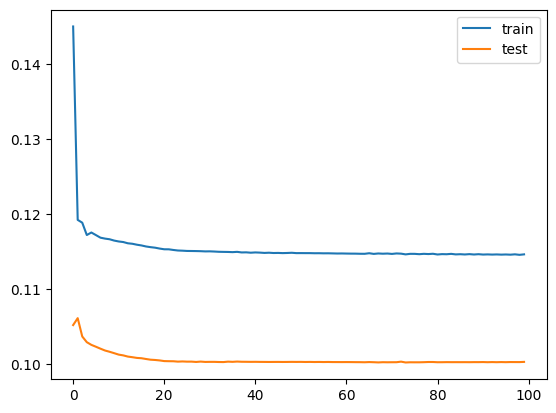

In [ ]:
# Fit network
history = model.fit(train_predictor, train_target, epochs=100, batch_size=72, validation_data=(test_predictor, test_target), verbose=2, shuffle=False)

# Plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### **Menggunakan ukuran batch yang berbeda untuk training dan prediksi (SKIP jika tidak perlu)**

In [ ]:
# redefine the batch size
n_batch = 1

In [ ]:
# redefine model
new_model = Sequential()
new_model.add(LSTM(50, input_shape=(train_predictor.shape[1], train_predictor.shape[2])))
new_model.add(Dense(1))

In [ ]:
# copy weights into new model
old_weights = model.get_weights()
new_model.set_weights(old_weights)

In [ ]:
# compile model
new_model.compile(loss='mae', optimizer='adam', metrics=["mae"])

In [ ]:
# make a prediction with batch size 1
scaled_predict_target = new_model.predict(test_predictor, batch_size=1)
test_predictor = test_predictor.reshape((test_predictor.shape[0], test_predictor.shape[2]))

443/443 [==============================] - 1s 2ms/step


### **Melakukan prediksi**

In [ ]:
# Melakukan prediksi
scaled_predict_target = model.predict(test_predictor)
test_predictor = test_predictor.reshape((test_predictor.shape[0], test_predictor.shape[2]))

34/34 [==============================] - 0s 2ms/step


In [ ]:
# invert scaling untuk hasil prediksi
inv_predict_target = concatenate((scaled_predict_target, test_predictor), axis=1)
inv_predict_target = scaler.inverse_transform(inv_predict_target)
inv_predict_target = inv_predict_target[:,0]

# invert scaling data test sebenarnya
test_target = test_target.reshape((len(test_target), 1))
inv_actual_target = concatenate((test_target, test_predictor), axis=1)
inv_actual_target = scaler.inverse_transform(inv_actual_target)
inv_actual_target = inv_actual_target[:,0]

In [ ]:
# Menampilkan nilai TARGET sebenarnya dan nilai TARGET hasil prediksi
data_tangkapan_best_predict = pd.DataFrame({'Actual': inv_actual_target, 'Predicted' : inv_predict_target})
data_tangkapan_best_predict.head(15)

,Actual,Predicted
0,3510.0,8681.220703
1,7427.0,8196.244141
2,3750.0,8270.762695
3,0.0,7127.908203
4,0.0,8173.281250
5,1560.0,8187.365723
6,60.0,7984.520508
7,1580.0,7802.051758
8,3180.0,7773.963867
9,8910.0,8392.291992


### **Menampilkan nilai TARGET sebenarnya dan nilai TARGET hasil prediksi dalam bentuk grafik**

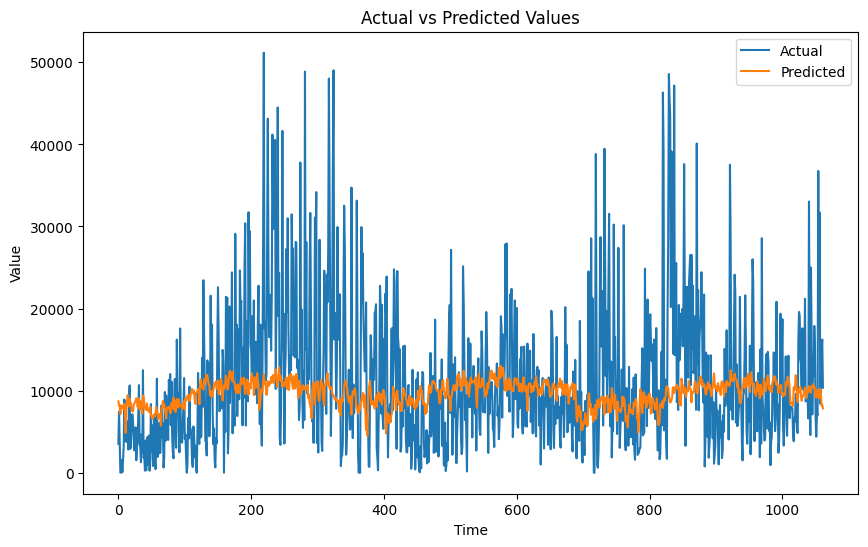

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(inv_actual_target, label='Actual')
plt.plot(inv_predict_target, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.show()

### **Evaluasi Model Regresi Linear**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Coefficient of Determination (R-squared score): ", r2_score(inv_actual_target, inv_predict_target))
print("Mean Absolute Error : ", mean_absolute_error(inv_actual_target, inv_predict_target))
print("Mean Squared Error : ", mean_squared_error(inv_actual_target, inv_predict_target))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(inv_actual_target, inv_predict_target)))

Coefficient of Determination (R-squared score):  -0.008711731688049396
Mean Absolute Error :  6216.186
Mean Squared Error :  76621020.0
Root Mean Squared Error :  8753.344


### **Save Model (.h5) & Scaler (joblib)**

In [ ]:
# Save the RNN model in HDF5 format
new_model.save("RNN model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the scaler to do inverse transform later
pickle.dump(scaler, open("scaler.pkl", "wb"))
